In [2]:
import ROOT
%jsroot on

In [3]:
# 打开 ROOT 文件
file_path = "gamma.root"
root_file = ROOT.TFile.Open(file_path)

# 检查文件是否成功打开
if not root_file or root_file.IsZombie():
    print(f"无法打开文件: {file_path}")
    exit(1)

# 3.1探测器能量刻度
## 1将 h0 谱与  152Eu和 133Ba的能谱进行对比，找出 h0 中道值为：102、136、239、266、288、323、332、688、762、843、969、1217的12个 -峰的位置

In [4]:
# 读取直方图
hist_name = "h0"  # 假设直方图的名称为 "hist"
data = ROOT.TH1F
hist = root_file.Get(hist_name)
data = hist

# 检查直方图是否存在
if not hist:
    print(f"直方图 {hist_name} 不存在于文件中")
    root_file.Close()
    exit(1)

# 创建画布
canvas = ROOT.TCanvas("canvas", "Gamma Histogram", 800, 600)

# 绘制直方图
data.Draw()

# 显示画布
canvas.Draw()

In [5]:
fitFunc = ROOT.TF1("fitFunc", "gaus")
mean1 =[]
sigma1 = []

In [6]:
data.GetXaxis().SetRangeUser(1215,1219)
data.Fit("fitFunc","","",1215,1219)
mean1.append(fitFunc.GetParameter(1))
sigma1.append(fitFunc.GetParameter(2))
data.Draw("SAME")
canvas.Draw()


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1802.86
NDf                       =           17
Edm                       =  6.67176e-08
NCalls                    =           72
Constant                  =       162855   +/-   156.384     
Mean                      =      1217.05   +/-   0.000778963 
Sigma                     =     0.958711   +/-   0.000745859  	 (limited)


In [7]:
data.GetXaxis().SetRangeUser(0,2500)
data.GetXaxis().SetRangeUser(842,846)
data.Fit("gaus","","",842,846)
mean1.append(fitFunc.GetParameter(1))
sigma1.append(fitFunc.GetParameter(2))
data.Draw("SAME")
canvas.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1896.87
NDf                       =           17
Edm                       =   2.6426e-07
NCalls                    =           74
Constant                  =       155787   +/-   157.079     
Mean                      =      843.845   +/-   0.000740902 
Sigma                     =      0.87806   +/-   0.000665767  	 (limited)


In [8]:
data.GetXaxis().SetRangeUser(0,2500)
data.GetXaxis().SetRangeUser(760,766)
data.Fit("gaus","","",760,766)
mean1.append(fitFunc.GetParameter(1))
sigma1.append(fitFunc.GetParameter(2))
data.Draw("SAME")
canvas.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      26437.9
NDf                       =           27
Edm                       =  1.38015e-11
NCalls                    =           77
Constant                  =      46357.2   +/-   84.5398     
Mean                      =      762.609   +/-   0.00142141  
Sigma                     =      1.08813   +/-   0.00152853   	 (limited)


In [9]:
mean1,sigma1

([1217.0452310184364, 1217.0452310184364, 1217.0452310184364],
 [0.9587113104491496, 0.9587113104491496, 0.9587113104491496])


<img src="133Ba.png" alt="Ba" width="800">
<img src="152Eu.png" alt="Eu" width="800">


## 寻峰并且与能量对应
这里利用python中的numpy与scipy包进行寻峰

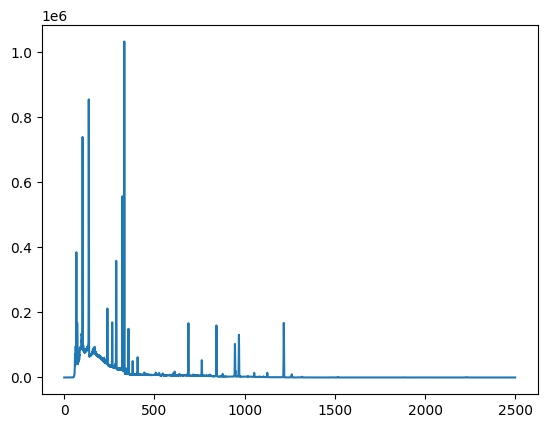

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

n_bins = data.GetNbinsX()
x_values = np.zeros(n_bins)
y_values = np.zeros(n_bins)

# 遍历每个 bin，获取中心值和内容
for i in range(1, n_bins + 1):  # ROOT 的 bin 索引从 1 开始
    x_values[i - 1] = data.GetBinCenter(i)  # 获取 bin 中心
    y_values[i - 1] = data.GetBinContent(i)  # 获取 bin 内容

plt.plot(x_values, y_values)


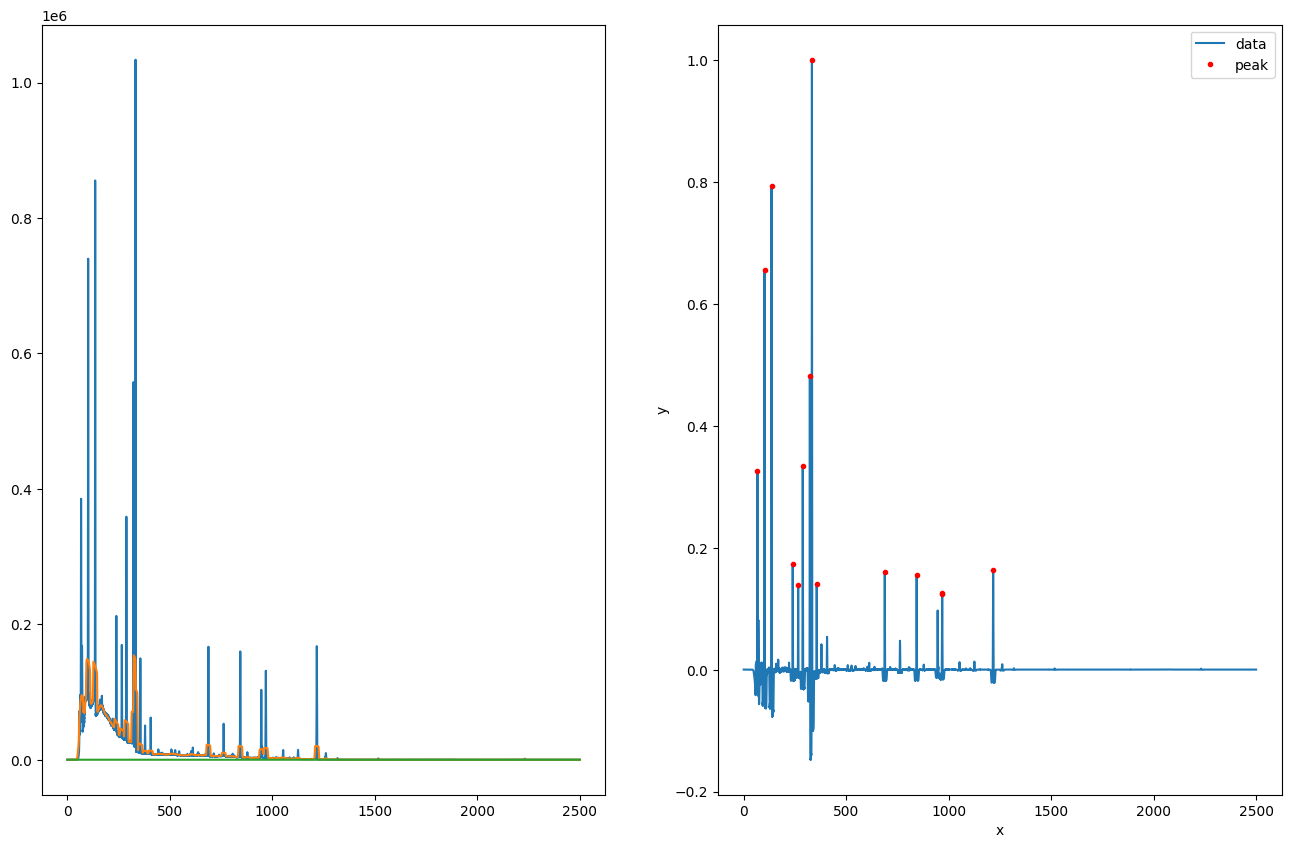

In [11]:
# 使用 Savitzky-Golay 滤波器平滑信号
window_length = 101  # 平滑窗口的长度，必须为奇数
polyorder = 1       # 多项式阶数
baseline = savgol_filter(y_values, window_length, polyorder)

# 去除基线
y_corrected = y_values - baseline
y_corrected = y_corrected/max(y_corrected) # 归一化
peaks, _ = find_peaks(y_corrected, height=0.10)  # height 参数可以设置峰值的最小高度


# 绘制结果
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='data')
plt.plot(x_values, baseline, label='baseline')
plt.plot(x_values, y_corrected, label='data without baseline')
plt.subplot(1, 2, 2)
plt.plot(x_values, y_corrected, label='data')
plt.plot(x_values[peaks], y_corrected[peaks], 'r.', label='peak')  # 'ro' 表示红色圆点
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
print(len(x_values[peaks]))
print(x_values[peaks])
print(y_corrected[peaks])

14
[  67.1  101.7  135.9  239.1  265.9  288.1  322.7  332.9  356.1  688.3
  843.7  968.1  968.5 1217.1]
[0.32527882 0.65571925 0.79292943 0.17276654 0.13829993 0.3344811
 0.48210838 1.         0.14032932 0.16046935 0.15465784 0.12434499
 0.12616521 0.1630754 ]


这里用scipy中的寻峰程找见了十四个峰，并且十四个峰的大小是高于10%的，经过对应后，我们可以得到能量数据
我们选取三个数据，分别为

| 列1 | 列2 | 列3 |列4 |
| --- | --- | --- |---|
道址|843.7 | 968.5 | 1217.1 |
能量| 964.08 | 1112.1 | 1408.0 |


按线性关系进行对上述两点进行拟合，然用此系数对h0进行粗刻度，从而找到其他 γ射线的能量和道值

拟合系数: [  1.18905877 -39.27857991]
[ 963.9303065  1112.32484132 1407.92485218]


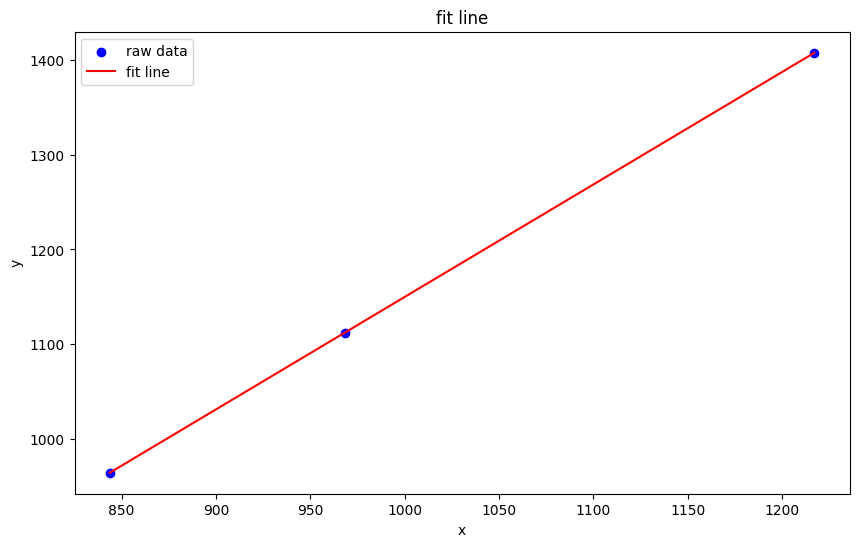

In [13]:
ch1 = np.array([ 843.7, 968.5, 1217.1])
energy1 = np.array([964.08, 1112.1, 1408.0])


# 使用 numpy.polyfit 进行线性拟合
coefficients = np.polyfit(ch1,energy1, 1)  # 1 表示一次多项式（线性）
print("拟合系数:", coefficients)

# 生成拟合直线的 y 值
energy1_fit = np.polyval(coefficients, ch1)
print(energy1_fit)

# 绘制原始数据和拟合直线
plt.figure(figsize=(10, 6))
plt.scatter(ch1,energy1, color='blue', label='raw data')
plt.plot(ch1, energy1_fit, color='red', label='fit line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('fit line')
plt.show()


[  82.00541489  122.43341316  244.90646673  277.01105359  303.17034659
  344.78740363  355.48893258  778.79385561  866.78420478  963.09796536
 1112.91937071 1407.8059463 ]


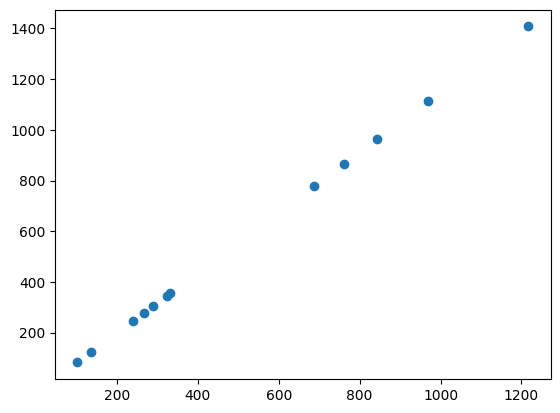

In [14]:
ch2 = np.array([102,136,239,266,288,323,332,688,762,843,969,1217])
energy2 = np.polyval(coefficients, ch2)
print(energy2)
plt.plot(ch2, energy2, 'o')


完成探测器的粗刻度，经过对应后，我们得到以下数据
| ch2  |   拟合能量      | 实际能量 |
| ---- | ------------- | ------- |
| 102  | 82.005415     | 81.00   |
| 136  | 122.433413    | 122.78  |
| 239  | 244.906467    | 244.70  |
| 266  | 277.011054    | 276.4   |
| 288  | 303.170347    | 302.9   |
| 323  | 344.787404    | 344.28  |
| 332  | 355.488933    | 356.0   |
| 688  | 778.793856    | 778.9   |
| 762  | 866.784205    | 867.37  |
| 843  | 963.097965    | 964.08  |
| 969  | 1112.919371   | 1112.1  |
| 1217 | 1407.805946   | 1408.0  |

In [15]:
energy = np.array([81.0, 122.78, 244.7, 276.4, 302.9, 344.28, 356.0, 778.9, 867.37, 964.08, 1112.1, 1408.0])
#这是实际的能量


### 2.对上述峰分别进行高斯拟合（鼓励选取更多的峰拟合），得到峰位和峰位误差。将每个峰的峰位（含峰位误差）与峰能量（ keV） 值填在 TGraphErrors 中。分别利用一次/二次多项式进行拟合，得到拟合系数

In [16]:
def fit_function(x, par):
    gauss = par[0] * ROOT.TMath.Exp(-0.5 * ((x[0] - par[1]) / par[2]) ** 2)
    linear = par[3] + x[0] * par[4]
    return gauss + linear

# 创建 TF1 对象，定义拟合区间和参数个数
fit_function_tf1 = ROOT.TF1("fit_function", fit_function, 0, 2500, 5)

peak_centers = []
peak_errors = []



In [17]:
fit_function_tf1.SetParameter(0, 1.0e6)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 332.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 328, 338)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(325, 340)
canvas.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      11800.6
NDf                       =           45
Edm                       =  1.99227e-09
NCalls                    =          231
p0                        =       990319   +/-   434.549     
p1                        =      332.757   +/-   0.000253158 
p2                        =     0.694658   +/-   0.000209446 
p3                        =       548158   +/-   2298.48     
p4                        =     -1591.14   +/-   6.87454     


In [18]:
fit_function_tf1.SetParameter(0, 1.0e3)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 102.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 95,106)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(95, 106)
canvas.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      49804.4
NDf                       =           50
Edm                       =  3.68113e-07
NCalls                    =         1158
p0                        =       601505   +/-   404.095     
p1                        =      101.635   +/-   0.00039286  
p2                        =     0.638399   +/-   0.000367047 
p3                        =       464615   +/-   1440.4      
p4                        =      -3559.1   +/-   14.3447     


In [19]:
fit_function_tf1.SetParameter(0, 1.0e3)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 244.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 235, 243)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(235, 243)
canvas.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1241.02
NDf                       =           35
Edm                       =  6.18135e-07
NCalls                    =          337
p0                        =       174387   +/-   218.066     
p1                        =      239.191   +/-   0.000782813 
p2                        =     0.655755   +/-   0.000756353 
p3                        =       213411   +/-   3470.75     
p4                        =     -716.761   +/-   14.5216     


In [20]:
fit_function_tf1.SetParameter(0, 1.0e3)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 266.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 262, 270)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(262, 270)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1072.78
NDf                       =           35
Edm                       =  1.03574e-08
NCalls                    =          390
p0                        =       130427   +/-   188.801     
p1                        =      265.821   +/-   0.000926702 
p2                        =     0.665149   +/-   0.00091207  
p3                        =       145020   +/-   3482.85     
p4                        =     -418.582   +/-   13.0791     


In [21]:
fit_function_tf1.SetParameter(0, 1.0e3)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 288.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 284, 292)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(284, 292)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      2685.11
NDf                       =           35
Edm                       =  3.63052e-06
NCalls                    =          275
p0                        =       318654   +/-   265.092     
p1                        =      288.048   +/-   0.000505213 
p2                        =     0.676043   +/-   0.00046748  
p3                        =       205706   +/-   3490.94     
p4                        =     -613.807   +/-   12.1128     


In [22]:
fit_function_tf1.SetParameter(0, 1.0e5)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 323.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 320, 327)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(320, 327)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      5799.76
NDf                       =           30
Edm                       =  4.26471e-07
NCalls                    =          237
p0                        =       532750   +/-   327.542     
p1                        =      322.886   +/-   0.000371009 
p2                        =     0.689598   +/-   0.000338443 
p3                        =       436534   +/-   5138.49     
p4                        =     -1275.39   +/-   15.8245     


In [23]:
fit_function_tf1.SetParameter(0, 1.0e5)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 688.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 684, 692)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(684, 692)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586, 688.1973522100828]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      2022.86
NDf                       =           35
Edm                       =   9.3792e-06
NCalls                    =          193
p0                        =       156630   +/-   163.85      
p1                        =      688.197   +/-   0.000727392 
p2                        =     0.806808   +/-   0.000649538 
p3                        =       132049   +/-   4048.68     
p4                        =     -183.043   +/-   5.88501     


In [24]:
fit_function_tf1.SetParameter(0, 1.0e5)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 762.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 758, 766)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(758, 766)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586, 688.1973522100828, 762.6059642017501]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      599.665
NDf                       =           35
Edm                       =  5.60273e-07
NCalls                    =          216
p0                        =      46680.1   +/-   93.8906     
p1                        =      762.606   +/-   0.00153724  
p2                        =     0.826361   +/-   0.00150928  
p3                        =      45271.3   +/-   4505.15     
p4                        =     -51.9773   +/-   5.91869     


In [25]:
fit_function_tf1.SetParameter(0, 1.0e5)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 843.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 840, 848)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(840, 848)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586, 688.1973522100828, 762.6059642017501, 843.8386893897098]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      2924.79
NDf                       =           35
Edm                       =  3.86013e-09
NCalls                    =          224
p0                        =       152264   +/-   155.677     
p1                        =      843.839   +/-   0.000748198 
p2                        =     0.848105   +/-   0.000654628 
p3                        =       158834   +/-   4454.22     
p4                        =      -182.84   +/-   5.2736      


In [26]:
fit_function_tf1.SetParameter(0, 1.0e4)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 969.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 965,974)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(965, 974)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586, 688.1973522100828, 762.6059642017501, 843.8386893897098, 968.2300503846932]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      3827.54
NDf                       =           40
Edm                       =  8.50587e-08
NCalls                    =          278
p0                        =       127012   +/-   140.363     
p1                        =       968.23   +/-   0.000850548 
p2                        =     0.873488   +/-   0.000789183 
p3                        =       462355   +/-   5571.7      
p4                        =      -472.89   +/-   5.73257     


In [27]:
fit_function_tf1.SetParameter(0, 1.0e5)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 1217.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 1215, 1220)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(1215, 1220)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586, 688.1973522100828, 762.6059642017501, 843.8386893897098, 968.2300503846932, 1217.0793800875906]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      433.771
NDf                       =           20
Edm                       =  1.96225e-07
NCalls                    =          265
p0                        =       158523   +/-   153.955     
p1                        =      1217.08   +/-   0.000777004 
p2                        =     0.908528   +/-   0.000854623 
p3                        =   2.2914e+06   +/-   353.726     
p4                        =     -1877.43   +/-   0.289931    


In [28]:
fit_function_tf1.SetParameter(0, 1.0e5)  # 高斯函数高度
fit_function_tf1.SetParameter(1, 136.0)  # 高斯函数峰中心
fit_function_tf1.SetParameter(2, 1.0)    # 高斯函数 sigma
fit_function_tf1.SetParameter(3, 1.0e3)  # 线性函数零次项
fit_function_tf1.SetParameter(4, 0.01)   # 线性函数一次项
data.GetXaxis().SetRangeUser(0, 2500)
data.Fit(fit_function_tf1, "", "", 133, 140)
peak_centers.append(fit_function_tf1.GetParameter(1))
peak_errors.append(fit_function_tf1.GetParError(1))
data.Draw()
data.GetXaxis().SetRangeUser(133, 140)
canvas.Draw()
print(peak_centers)

[332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586, 688.1973522100828, 762.6059642017501, 843.8386893897098, 968.2300503846932, 1217.0793800875906, 135.96843981778]
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      6634.02
NDf                       =           30
Edm                       =  1.36866e-06
NCalls                    =          275
p0                        =       748504   +/-   427.484     
p1                        =      135.968   +/-   0.000326186 
p2                        =     0.623955   +/-   0.00030556  
p3                        =       801781   +/-   3683.61     
p4                        =     -5288.86   +/-   26.791      


#### 完成对十二个峰的拟合，并输出峰的中心位置与误差

In [29]:
print("peak_centers = ", peak_centers)
print("peak_errors = ", peak_errors)
print("energy = ",energy)

peak_centers =  [332.75697558609323, 101.63511288294563, 239.19067881794254, 265.82130945365753, 288.04819734959466, 322.88629328202586, 688.1973522100828, 762.6059642017501, 843.8386893897098, 968.2300503846932, 1217.0793800875906, 135.96843981778]
peak_errors =  [0.00025315811126394594, 0.00039285991625436016, 0.0007828130344903146, 0.0009267024787208778, 0.0005052127665472621, 0.0003710092345717199, 0.0007273922392835841, 0.0015372383282298454, 0.0007481977490721984, 0.000850547715629522, 0.0007770041236077506, 0.0003261857981822157]
energy =  [  81.    122.78  244.7   276.4   302.9   344.28  356.    778.9   867.37
  964.08 1112.1  1408.  ]


In [30]:
dir = {}
for i in range(len(peak_centers)):
    dir[peak_centers[i]] = peak_errors[i]
sorted_keys = sorted(dir.keys())
sorted_items = {key: dir[key] for key in sorted_keys}
print(sorted_items)

{101.63511288294563: 0.00039285991625436016, 135.96843981778: 0.0003261857981822157, 239.19067881794254: 0.0007828130344903146, 265.82130945365753: 0.0009267024787208778, 288.04819734959466: 0.0005052127665472621, 322.88629328202586: 0.0003710092345717199, 332.75697558609323: 0.00025315811126394594, 688.1973522100828: 0.0007273922392835841, 762.6059642017501: 0.0015372383282298454, 843.8386893897098: 0.0007481977490721984, 968.2300503846932: 0.000850547715629522, 1217.0793800875906: 0.0007770041236077506}


In [31]:
peak_centers = np.array(list(sorted_items.keys()))
peak_errors = np.array(list(sorted_items.values()))
energy = np.array(energy)
energy_errors =np.zeros(12)  # 创建一个长度为12的零数组，用于存储能量误差，误差为0
gr = ROOT.TGraphErrors(len(peak_centers), peak_centers, energy, peak_errors, energy_errors)
gr.SetTitle("channel vs energy")
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)
cgr = ROOT.TCanvas("cgr", "TGraphErrors", 800, 600)
gr.Draw("ALP")
cgr.Draw()

#### 分别用一次多项式和二次多项式进行拟合

##### 一次多项式拟合

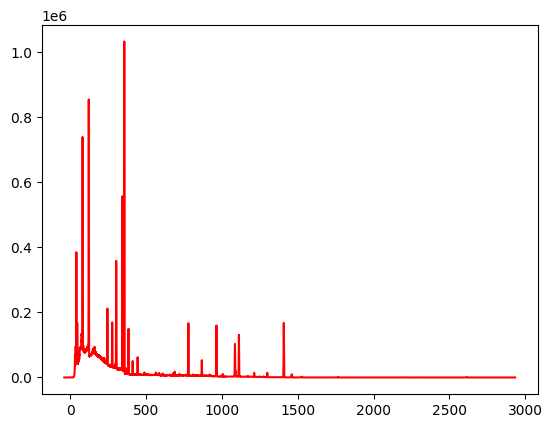

In [32]:
coefficients1 = np.polyfit(peak_centers,energy, 1)  # 1 表示一次多项式
slope1, intercept1 = coefficients1

# 拟合函数
energy_fit1 = slope1 * x_values + intercept1
plt.plot(energy_fit1,y_values, color='red', label='Linear Fit')

##### 二次多项式拟合|

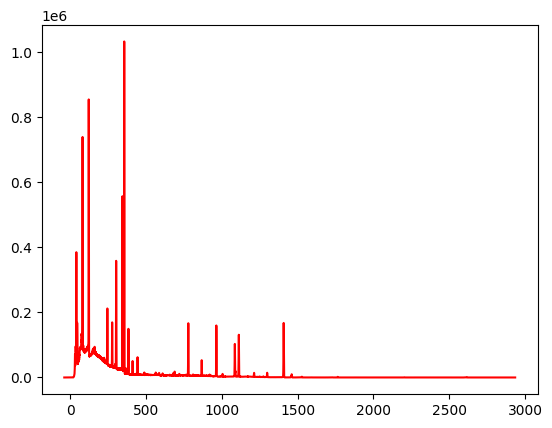

In [33]:
coefficients2 = np.polyfit(peak_centers,energy, 2)  # 1 表示一次多项式
a2, b2 ,c2  = coefficients2

# 拟合函数
energy_fit2 = a2 * pow(x_values,2) + b2*x_values + c2
plt.plot(energy_fit2,y_values, color='red', label='Linear Fit')

利用残差图评估能量刻度效果。

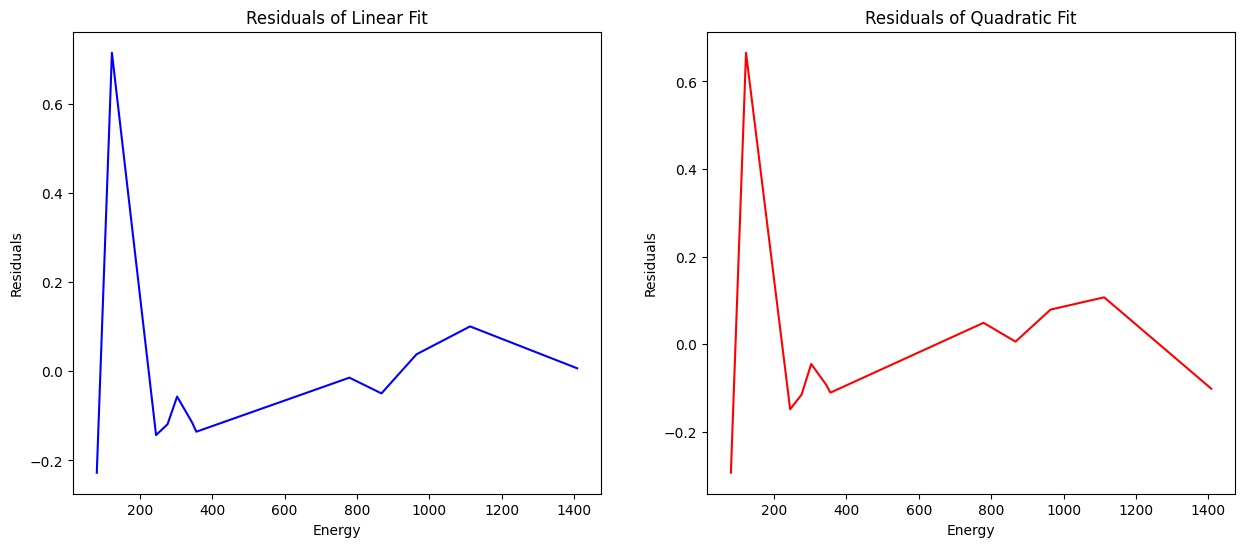

In [34]:
energy_fit11 = slope1 * peak_centers + intercept1
energy_fit22 = a2 * pow(peak_centers,2) + b2*peak_centers + c2
dE1 = energy - energy_fit11
dE2 = energy - energy_fit22
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(energy, dE1, 'b')
plt.title('Residuals of Linear Fit')
plt.xlabel('Energy')
plt.ylabel('Residuals')
plt.subplot(1, 2, 2)
plt.plot(energy, dE2, 'r')
plt.title('Residuals of Quadratic Fit')
plt.xlabel('Energy')
plt.ylabel('Residuals')
plt.show()

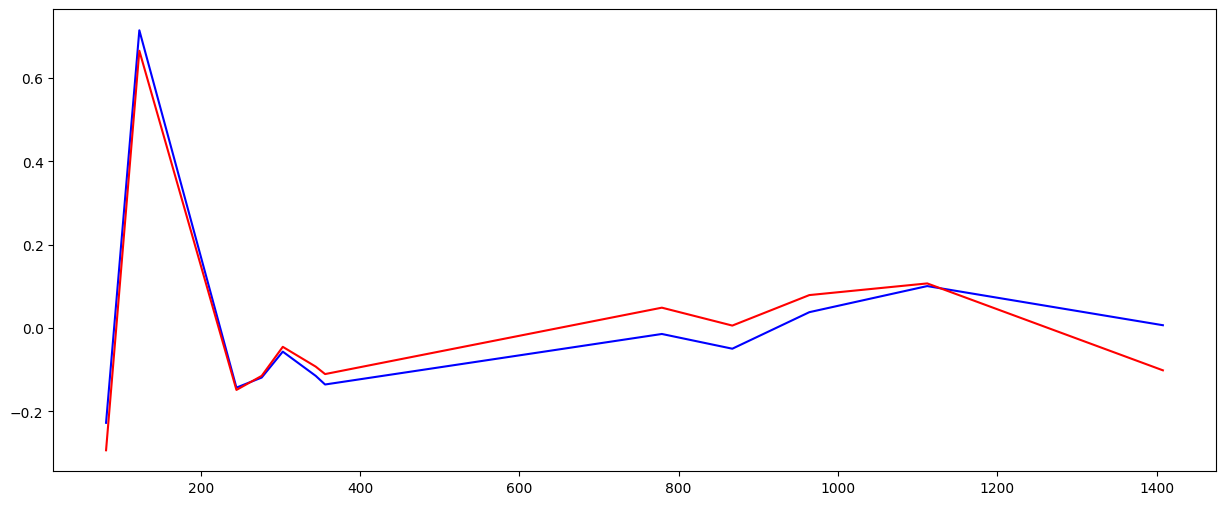

In [128]:
plt.figure(figsize=(15, 6))
plt.plot(energy, dE1, 'b', label='Linear Fit')
plt.plot(energy, dE2, 'r', label='Quadratic Fit')
plt.show()

In [126]:
dE1

array([-0.22750711,  0.7147003 , -0.14304257, -0.11885925, -0.05664198,
       -0.11483229, -0.13552021, -0.01425074, -0.04961082,  0.03808431,
        0.10071889,  0.00676146])

In [127]:
dE2

array([-0.293407  ,  0.66559991, -0.14856067, -0.11481997, -0.04515538,
       -0.09264248, -0.11051308,  0.04887928,  0.00590069,  0.07911237,
        0.10709383, -0.10148749])